# Load LGMR data

In [2]:
import xarray as xr
# import numpy as np

data_dir = 'D:/VScode/Last_deglaciation/climo_ana_data'
ds_sat = xr.open_dataset(data_dir + '/ds_GMM_climo_relabeled.nc')

# read the all_weighted_avg_curves
import pickle
with open('ens_ana_data/all_weighted_avg_curves_checked.pkl', 'rb') as f:
    all_weighted_avg_curves = pickle.load(f)

# Load TraCE all

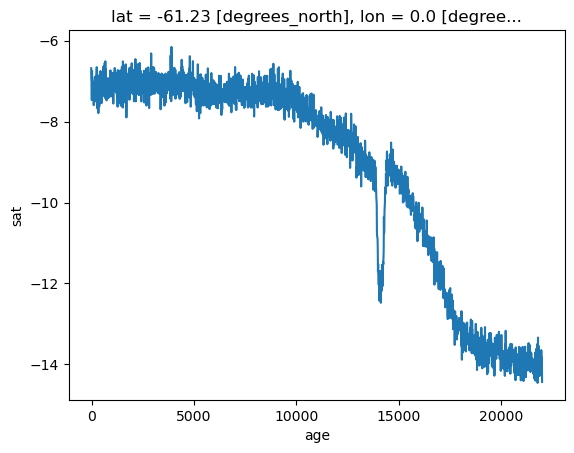

In [3]:
import xarray as xr

# import .nc data
ds = xr.open_dataset('TraCE_data/trace.01-36.22000BP.cam2.TREFHT.22000BP_decavg_400BCE.nc')

# rename the TREFHT to sat
ds = ds.rename({'TREFHT': 'sat'})
# rename the time to age
ds = ds.rename({'time': 'age'})
# multiply age by 1000
ds['age'] = ds['age'] * -1000

# convert the sat to degrees C
ds['sat'] = ds['sat'] - 273.15

ds = ds[['sat']]

ds_trace=ds

ds_trace['sat'].isel(lat=7, lon=0).plot()


# read the TraCE_weighted_avg_LGMR_mask.pkl
import pickle
with open('data_fig2/TraCE_weighted_avg_LGMR_mask.pkl', 'rb') as f:
    TraCE_weighted_avg_LGMR_mask = pickle.load(f)

# LGMR VS TraCE all

Text(0, 0.5, 'Normalized temperature difference')

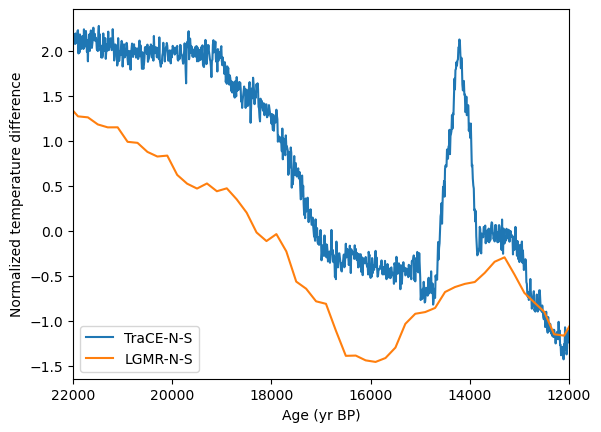

In [14]:
import numpy as np

LGMR_S= [curves[0] for curves in all_weighted_avg_curves]
# calculate the median
LGMR_S = np.median(LGMR_S, axis=0)

LGMR_N= [curves[1] for curves in all_weighted_avg_curves]
# calculate the median
LGMR_N = np.median(LGMR_N, axis=0)
LGMR_age=ds_sat['age'].values

trace_all_S=TraCE_weighted_avg_LGMR_mask[0]
trace_all_N=TraCE_weighted_avg_LGMR_mask[1]
trace_age=ds_trace['age'].values


# import matplotlib.pyplot as plt
# fig, ax = plt.subplots()
# ax.plot(LGMR_age, LGMR_S, label='LGMR-S')
# ax.plot(LGMR_age, LGMR_N, label='LGMR-N')
# ax.plot(trace_age, trace_all_S, label='TraCE-S')
# ax.plot(trace_age, trace_all_N, label='TraCE-N')
# ax.legend()

# plot N minor S
import matplotlib.pyplot as plt
from scipy.stats import zscore
fig, ax = plt.subplots()
# ax.plot(LGMR_age, LGMR_N-LGMR_S, label='LGMR-N-S')
# ax.plot(trace_age, trace_all_N-trace_all_S, label='TraCE-N-S')
# normalized the difference using zscore

LGMR_N_S = zscore(LGMR_N - LGMR_S)
trace_all_N_S = zscore(trace_all_N - trace_all_S)

ax.plot(trace_age, trace_all_N_S, label='TraCE-N-S')
ax.plot(LGMR_age, LGMR_N_S, label='LGMR-N-S')
ax.legend()
# set x limit
ax.set_xlim([22000, 12000])
# x and y label
ax.set_xlabel('Age (yr BP)')
ax.set_ylabel('Normalized temperature difference')



